# Supervised Learning - Project

> In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the **annual spending**  in **monetary units (m.u.)** on diverse product categories sold by a grocery store.

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

**Table of contents**:

**Part I** : EDA - Exploratory Data Analysis & Pre-processing
  1. Import libraries
  2. Load data
  3. Preliminary data check
  4. Explore data by descriptive statistics
  5. Explore data by visualization
  6. Handle outliers
  7. Data Transformation
     
**Part II** - KMeans Clustering

**Part III** - Hierarchical Clustering

**Part IV** - PCA
  1. Determine the optimal number of principal components for PCA
  2. Perform PCA with 3 principal components and then Clustering
  3. Perform PCA with 2 principal components and then Clustering
     
**Part V** - Conclusion

# Part I : EDA - Exploratory Data Analysis & Pre-processing

**Guidance**:

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### 1. Import labraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
from functions_variables import *
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from IPython.display import HTML, Image

### 2. Load data

In [2]:
df = pd.read_csv('data/Wholesale_Data.csv')
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

### 3. Preliminary check

In [3]:
df.shape     # Check shape

(440, 8)

***Comment:*** Dataset has 440 rows, 8 columns.

In [4]:
df.info()     # Check data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


***Comment:*** It seems like there is no missing values

In [5]:
df.nunique()        

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

***Comment:*** `Channel` and `Region` are categorical variables, the rest are numerical variables.

In [6]:
cat_cols = df[['Channel','Region']].columns
num_cols = df.drop(cat_cols,axis=1).columns

cat_cols, num_cols

(Index(['Channel', 'Region'], dtype='object'),
 Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object'))

In [7]:
# Check for duplicated rows
df.duplicated().sum()     

0

***Comment:***   No duplicated rows

In [8]:
# Check for missing values
df.isnull().any().sum()    

0

***Comment:***  No missing values

### 4. Explore data by descriptive statistics

In [9]:
pd.set_option('display.float_format', '{:.0f}'.format)
df.describe()        

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
count      440     440    440   440      440     440               440   
mean         1       3  12000  5796     7951    3072              2881   
std          0       1  12647  7380     9503    4855              4768   
min          1       1      3    55        3      25                 3   
25%          1       2   3128  1533     2153     742               257   
50%          1       3   8504  3627     4756    1526               816   
75%          2       3  16934  7190    10656    3554              3922   
max          2       3 112151 73498    92780   60869             40827   

       Delicassen  
count         440  
mean         1525  
std          2820  
min             3  
25%           408  
50%           966  
75%          1820  
max         47943

***Comment:*** The descriptive statistics table provides an overview of the "Wholesale Data" dataset, which includes annual spending on various product categories. Overall, the data exhibits significant variability across different categories. It appears no incorrect/invalid data.

In [10]:
df.groupby(['Channel','Region'])[['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper', 'Delicassen']].describe().T

Channel                    1                  2            
Region                     1     2      3     1     2     3
Fresh            count    59    28    211    18    19   105
                 mean  12902 11651  13878  5200  7290  9832
                 std   12342  8969  14747  5416  6868  9635
                 min     514     3      3    18   161    23
                 25%    4438  4938   3702  2378  2368  2343
                 50%    8656  9787   9612  2926  6468  7362
                 75%   18135 17032  18821  5988  9162 15076
                 max   56083 32717 112151 20782 27082 44466
Milk             count    59    28    211    18    19   105
                 mean   3870  2304   3487 10784  9191 10981
                 std    4298  2969   4509  6609  6611 10575
                 min     258   333     55  2527   928  1124
                 25%    1071  1146   1188  6253  4148  6128
                 50%    2280  1560   2247  8866  6817  7845
                 75%    4996  2345   4205 13112 13128 11114
                 max   23527 16784  43950 28326 25071 73498
Grocery          count    59    28    211    18    19   105
                 mean   4026  4396   3887 18472 16326 15954
                 std    3630  3048   3594 10415 14035 12299
                 min     489  1330      3  5265  2743  4523
                 25%    1620  2374   1666 10634  9318  9170
                 50%    2576  3352   2642 16106 12469 12121
                 75%    5172  5528   4928 23479 19786 19805
                 max   16966 13626  21042 39694 67298 92780
Frozen           count    59    28    211    18    19   105
                 mean   3127  5745   3657  2584  1541  1513
                 std    3276 11454   4957  2425  2473  1504
                 min      91   264     25    61   131    33
                 25%     966   962    779   924   640   437
                 50%    1859  2696   1960  1522   934  1059
                 75%    4479  4617   4542  3843  1410  2194
                 max   18711 60869  36534  8321 11559  8132
Detergents_Paper count    59    28    211    18    19   105
                 mean    951   483    787  8225  8410  6899
                 std    1306   425   1100  5516  8287  6022
                 min       5    15      3   788   332   523
                 25%     237   183    176  4818  3900  3537
                 50%     412   325    375  6177  6236  5121
                 75%     874   707    948 11805  9838  7677
                 max    5828  1679   6907 19410 38102 40827
Delicassen       count    59    28    211    18    19   105
                 mean   1197  1106   1518  1872  1239  1826
                 std    1220  1057   3663  1626  1065  2119
                 min       7    51      3   120    59     3
                 25%     374   567    378   746   392   545
                 50%     749   883    823  1414  1037  1386
                 75%    1622  1146   1582  2456  1815  2158
                 max    6854  5609  47943  6372  3508 16523

***Comment:*** 

It appears no incorrect/nvalid data.

In [11]:
# Reset float_format display option to default value
pd.reset_option('display.float_format')

### 5. Explore data by visualization

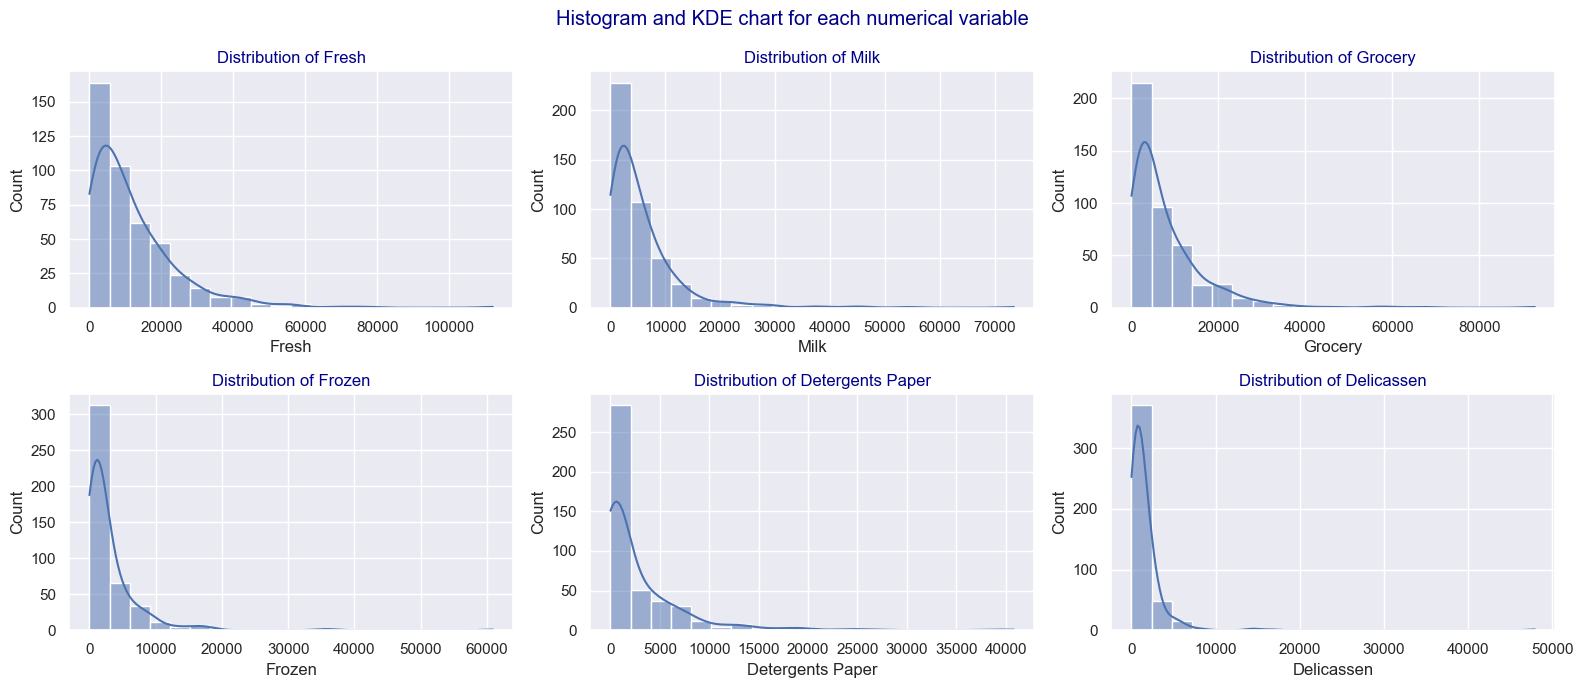

In [12]:
# Plot histogram for numerical features
def_Draw_Histograms_Univariate(df, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], nrows=2, ncols=3)

***Comment***:

All product categories have right-skewed distributions, as indicated by the differences between mean and median values and the high standard deviations.

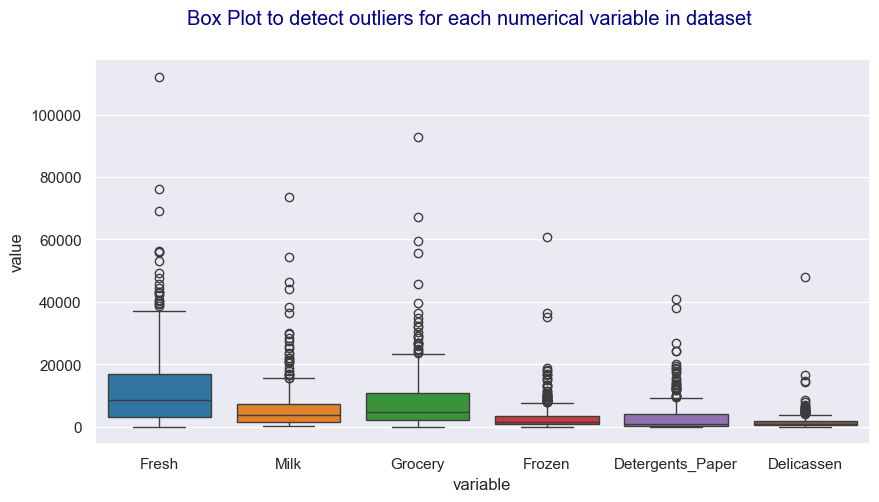

In [13]:
# Outlier detection by using box plot

plt.figure(figsize=(10,5))
sns.boxplot(x='variable', y='value', data=df[num_cols].melt(), palette='tab10')
plt.suptitle('Box Plot to detect outliers for each numerical variable in dataset', color='DarkBlue')
plt.show()

***Insights on the distribution with outliers***:
* `Fresh`: a wide range of fresh product sales with significant variability, as indicated by the high standard deviation and a large difference between the minimum and maximum values.
* `Milk`: Milk sales also exhibit a wide distribution with a significant spread and high maximum value, suggesting a diverse range of consumption patterns.
* `Grocery`: Similar to Fresh and Milk, grocery items have a broad range with a high variability, indicating different buying habits or store sizes.
* `Frozen`: Frozen product sales are lower on average compared to Fresh, Milk, and Grocery but still show considerable variation.
* `Detergents_Paper`: Detergents and paper products have the lowest mean among non-food items but also display a wide distribution.
* `Delicassen`: Delicatessen items have the lowest mean and median, with a relatively high standard deviation, indicating some outliers with very high purchases.

==> I will handle these outliers later.

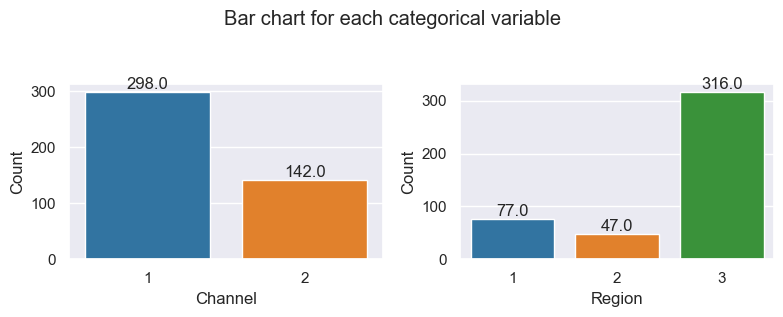

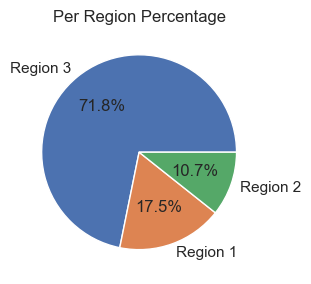

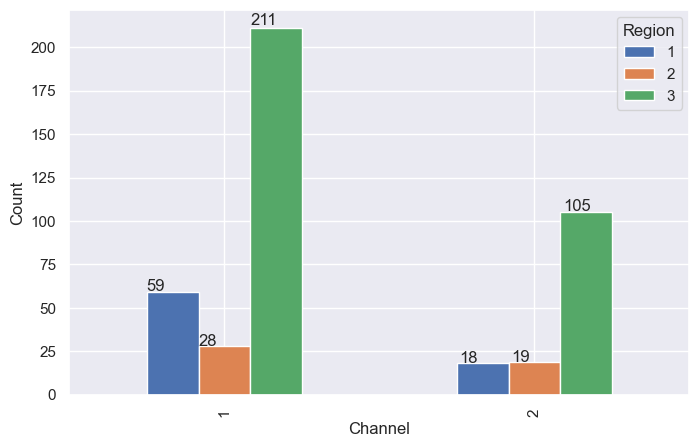

In [14]:
# Plot bar plot for categorical variables
def_Draw_Countplot_Univariate(df, ['Channel','Region'], nrows=1, ncols=2)

# Create pie plot for 'Region'
plt.figure(figsize=(6,3))
plt.title('Per Region Percentage',fontsize=12)
plt.pie(df['Region'].value_counts(), labels=['Region 3','Region 1','Region 2'], autopct='%.1f%%')
plt.tight_layout()
plt.show()

# Create crosstab
crosstab = pd.crosstab(df['Channel'], df['Region'])
ax = crosstab.plot(kind='bar', figsize=(8, 5))
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() * 1.01, p.get_height() * 1.01))
ax.set_ylabel('Count')
plt.show()

***Comment***: 
- Both Channel and Region are categorical variables with a total count of 440.
- `Channel`: has 2 categories. The majority of the data points belong to Channel 1 (with 298 out of 440 data points), which is double channel 2. This indicates a significant skew towards Channel 1.
- `Region`: 3 categories for the Region variable. Region 3 is the most represented, with 316 out of 440 data points. Region 1 has 77 data points, while Region 2 has the least with 47 data points. This indicates a strong skew towards Region 3. Region 3 retains more than 70% of variance.

---> Overall, both variables show a clear imbalance in their distributions, with **Channel 1** and **Region 3** being the **dominant** categories.

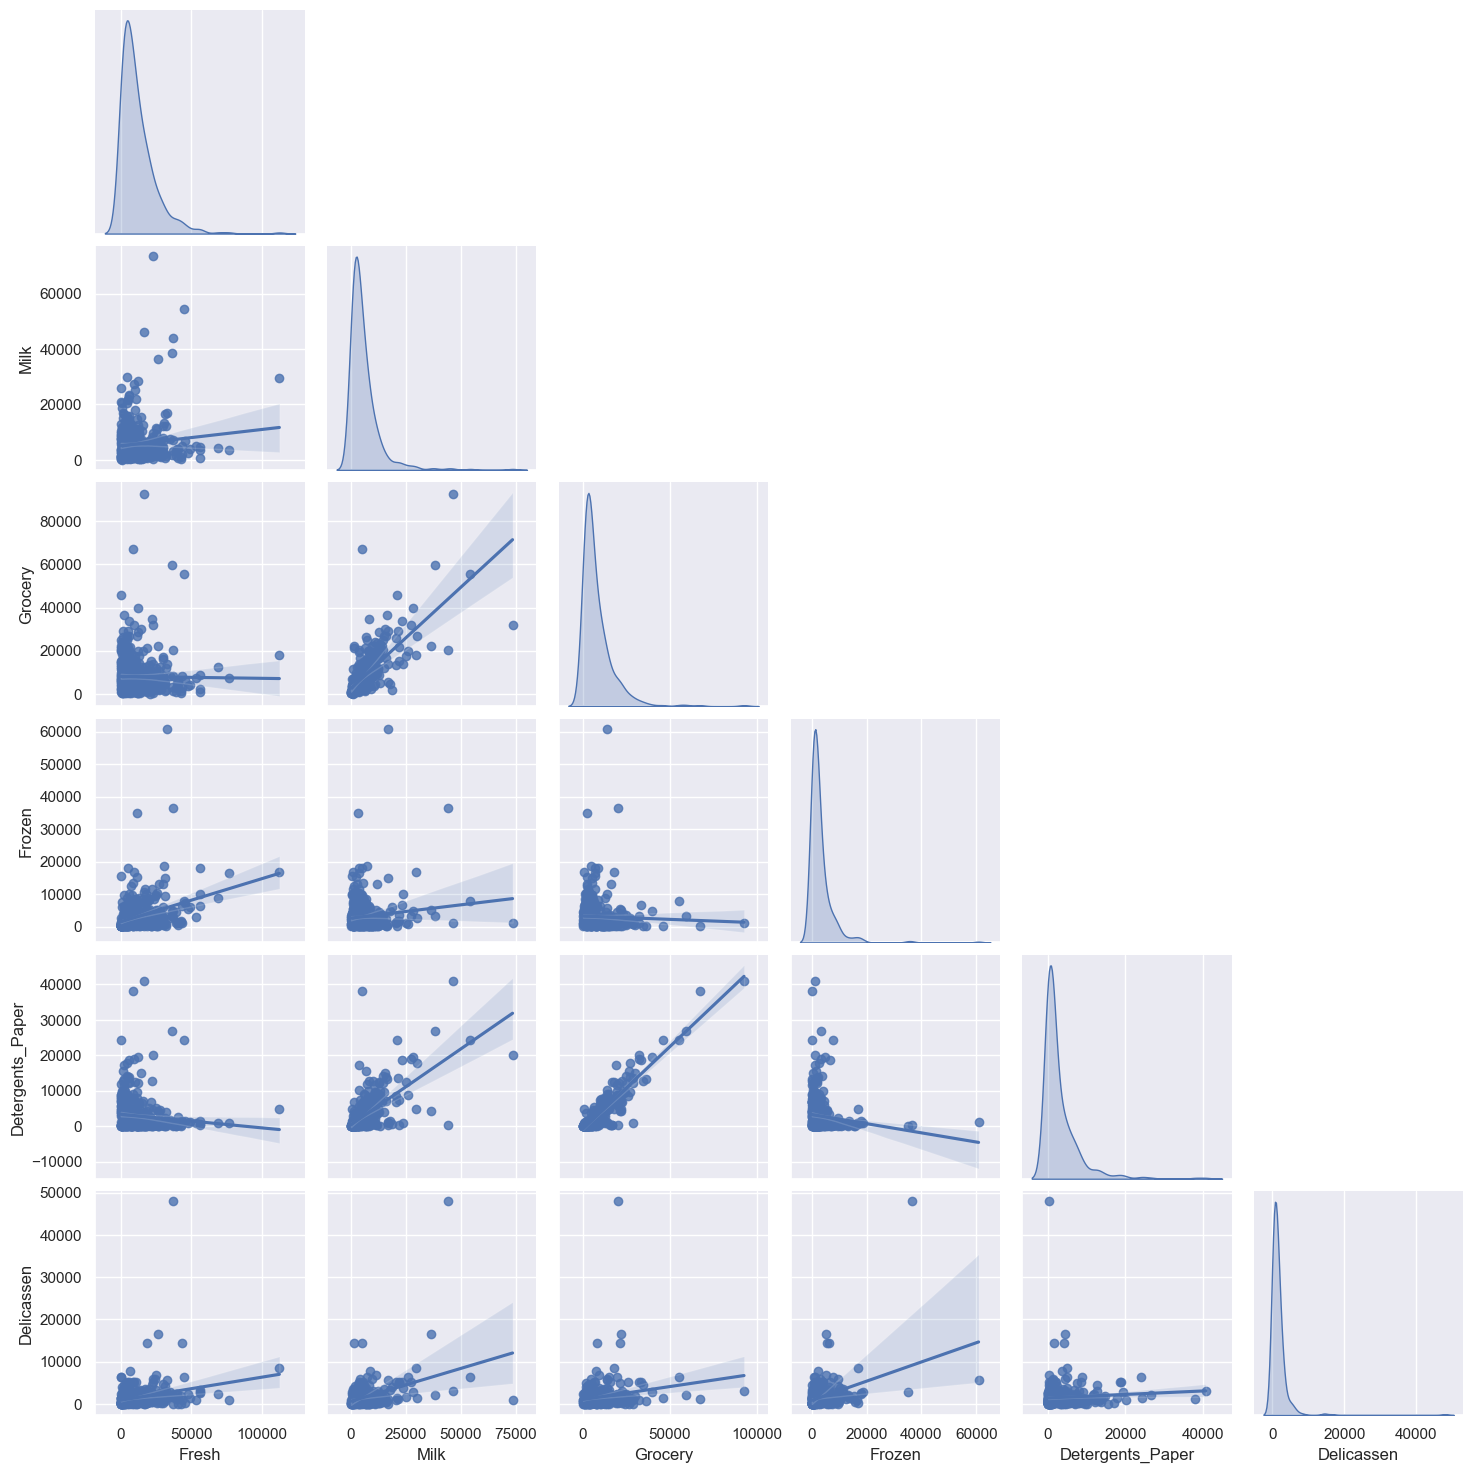

In [15]:
#Let's use seaborn's `pairplot` to informally check if there is linearity between the numerical variables
# Then take a closer look later

# sns.set(style="ticks")
sns.pairplot(data=df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']], corner=True, kind='reg', diag_kind='kde')
plt.show()

***Pair Plot Insights***:
- **Distribution**: The diagonal elements of the pair plot show the kernel density estimates (KDE) for each variable, indicating the distribution of each product category. Most distributions are right-skewed, with a few outliers evident, particularly in the Fresh, Milk, and Grocery categories.
- **Relationships**: Some variables exhibit positive linear relationships, most notably between **Milk & Grocery**, between **Grocery & Detergents_Paper**, and between**Milk & Detergents_Paper**
- **Outliers**: The plots also reveal the presence of outliers.

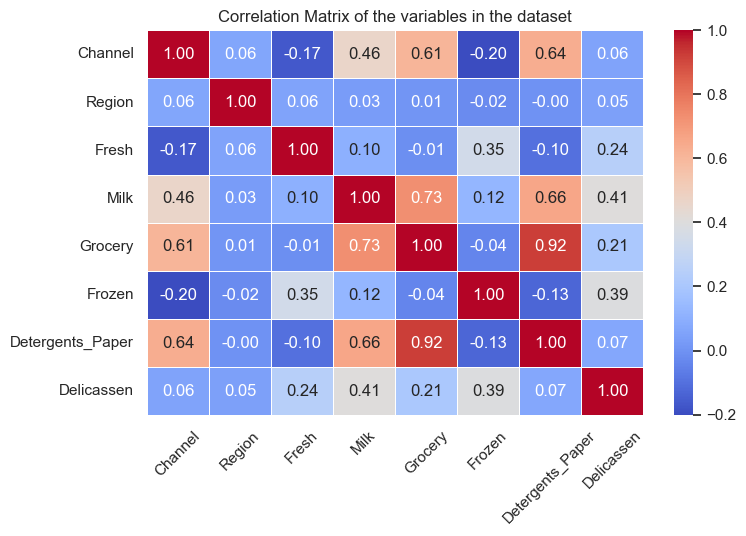

In [16]:
# Heat Visualization to identify strong and weak correlations between different product categories.

corr_matrix = df[['Channel','Region','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)   
plt.xticks(rotation=45)
plt.title("Correlation Matrix of the variables in the dataset")
plt.show()

***Correlation Matrix Insights***:
- High Correlations: There are strong positive correlations between several pairs of variables:
    - `Milk & Grocery` (0.73)
    - `Grocery & Detergents_Paper` (0.92)
    - `Milk & Detergents_Paper` (0.66)
  
  (these pairs was also discovered on Pair Plot above)
===> These high correlations suggest that **customers who spend more on Milk tend to spend more on Grocery and Detergents_Paper as well.**

- Low/Negative Correlations: Other variables show low correlations, indicating weak or no linear relationships. Negative correlations are observed between some categories, such as Channel and Fresh (-0.17), though they are not strong.

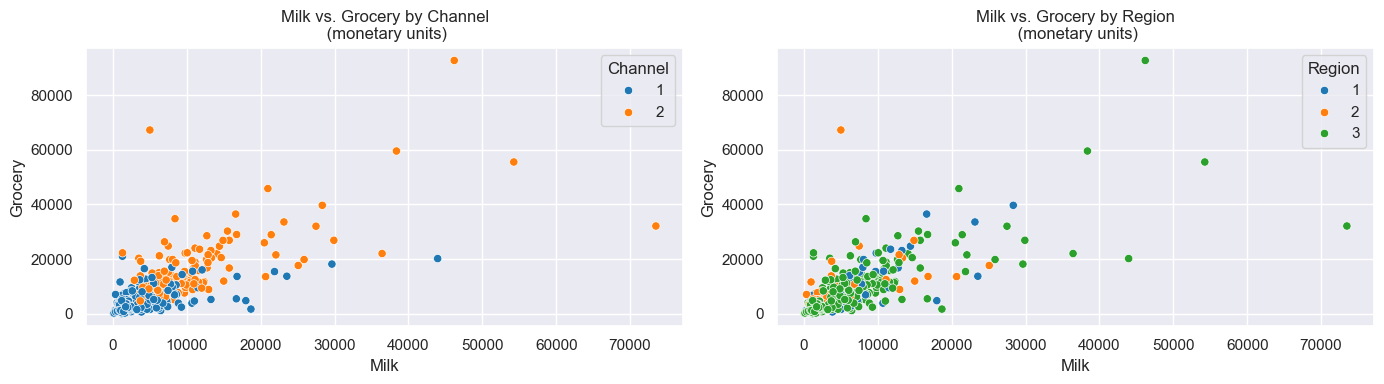

In [17]:
### MILK vs. GROCERY by CHANNEL and REGION

fig, axes = plt.subplots(figsize=(14, 4), ncols=2)

# Scatter plot 1: Milk vs. Grocery by Channel
sns.scatterplot(x='Milk', y='Grocery', hue='Channel', data=df, ax=axes[0], palette="tab10")
axes[0].set_title('Milk vs. Grocery by Channel\n (monetary units)')
axes[0].set_xlabel('Milk')
axes[0].set_ylabel('Grocery')
axes[0].legend(title='Channel', loc='upper right') 

# Scatter plot 2: Milk vs. Grocery by Region
sns.scatterplot(x='Milk', y='Grocery', hue='Region', data=df, ax=axes[1], palette="tab10")
axes[1].set_title('Milk vs. Grocery by Region\n (monetary units)')
axes[1].set_xlabel('Milk')
axes[1].set_ylabel('Grocery')
axes[1].legend(title='Region', loc='upper right') 

plt.tight_layout()
plt.show()

***Commnent*** Milk vs. Grocery
* `Outliers`: There are notable outliers in Channel 2 and Region 3 with high spending on both milk and groceries.
* `Linear relationship`: higher spending on milk generally correlating with higher spending on groceries.
* Customers in `Channel 2` (Blue) spend milk and grocery higher than `Channel 1`(Orange).
* In term of Region, customers in all three regions have varying needs to buy Milk & Grocery, wide range from little to much; however, `region 3` (Green) is dominant in numbers and has a few extremely high spenders.

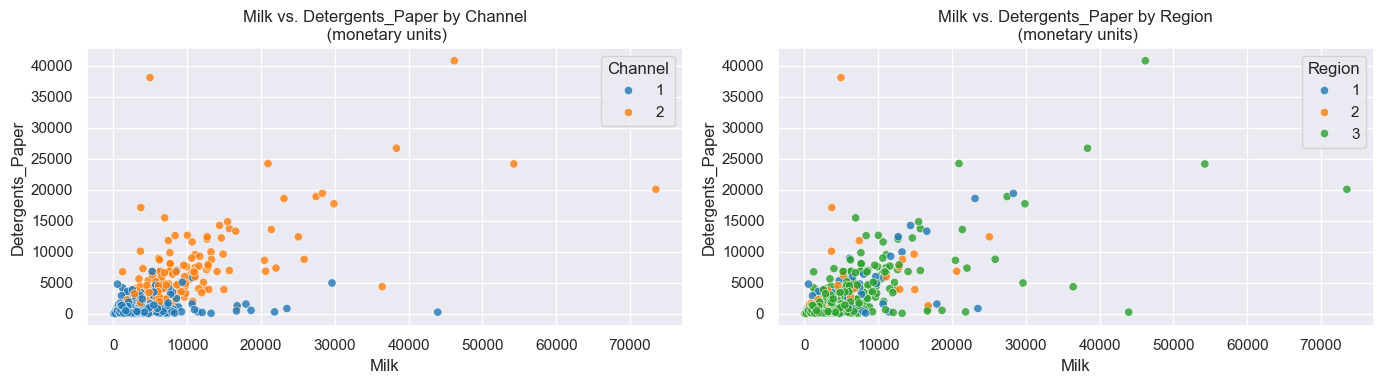

In [18]:
### MILK vs. DETERGENTS_PAPER by CHANNEL and REGION

fig, axes = plt.subplots(figsize=(14, 4), ncols=2)

# Scatter plot 1: Milk vs. Detergents_Paper by Channel
sns.scatterplot(x='Milk', y='Detergents_Paper', hue='Channel', data=df, ax=axes[0], palette='tab10', alpha=0.8)
axes[0].set_title('Milk vs. Detergents_Paper by Channel\n (monetary units)')
axes[0].set_xlabel('Milk')
axes[0].set_ylabel('Detergents_Paper')
axes[0].legend(title='Channel', loc='upper right') 

# Scatter plot 2: Milk vs. Detergents_Paper by Region
sns.scatterplot(x='Milk', y='Detergents_Paper', hue='Region', data=df, ax=axes[1], palette='tab10', alpha=0.8)
axes[1].set_title('Milk vs. Detergents_Paper by Region\n (monetary units)')
axes[1].set_xlabel('Milk')
axes[1].set_ylabel('Detergents_Paper')
axes[1].legend(title='Region', loc='upper right') 

plt.tight_layout()
plt.show()

***Commnent*** Milk vs. Detergents_Paper is very similar to the pair above
* `Outliers`: There are notable outliers in Channel 2 and Region 3 with high spending on both Milk and Detergents_Paper.
* `Linear relationship`: higher spending on Milk generally correlating with higher spending on Detergents_Paper.
* Customers in `Channel 2` (Blue) spend milk and grocery higher than `Channel 1`(Orange).
* In term of Region, customers in all three regions have varying needs to buy Milk & Detergents_Paper, wide range from little to much; however, `region 3` (Green) is dominant in numbers and has a few extremely high spenders.

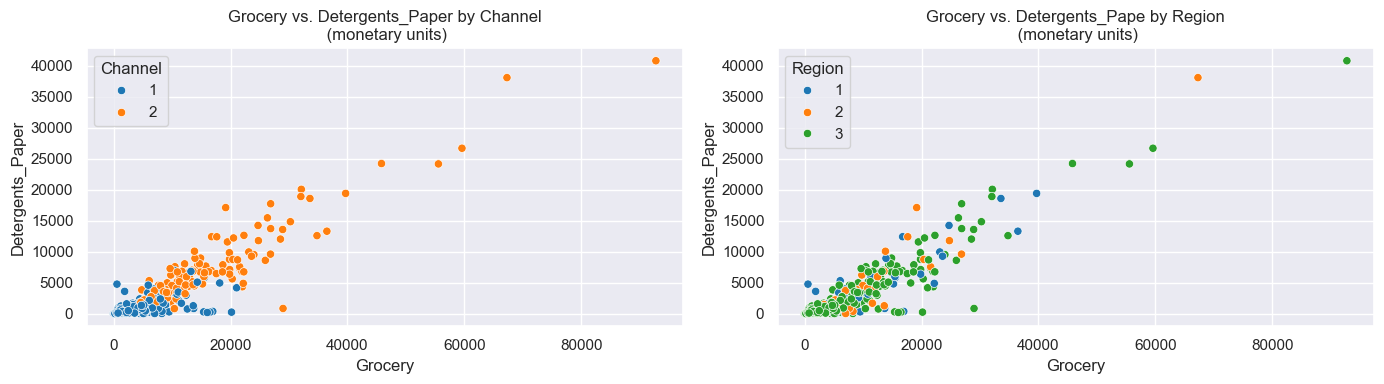

In [19]:
### GROCERY vs. DETERGENTS_PAPER  by CHANNEL and REGION

fig, axes = plt.subplots(figsize=(14, 4), ncols=2)

# Scatter plot 1: Grocery vs. Detergents_Pape by Channel
sns.scatterplot(x='Grocery', y='Detergents_Paper', hue='Channel', data=df, ax=axes[0], palette="tab10")
axes[0].set_title('Grocery vs. Detergents_Paper by Channel\n (monetary units)')
axes[0].set_xlabel('Grocery')
axes[0].set_ylabel('Detergents_Paper')
axes[0].legend(title='Channel', loc='upper left') 

# Scatter plot 2: Grocery vs. Detergents_Pape by Region
sns.scatterplot(x='Grocery', y='Detergents_Paper', hue='Region', data=df, ax=axes[1], palette="tab10")
axes[1].set_title('Grocery vs. Detergents_Pape by Region\n (monetary units)')
axes[1].set_xlabel('Grocery')
axes[1].set_ylabel('Detergents_Paper')
axes[1].legend(title='Region', loc='upper left')  

plt.tight_layout()
plt.show()

***Commnent*** Grocery vs. Detergents_Paper is very similar to the pair above

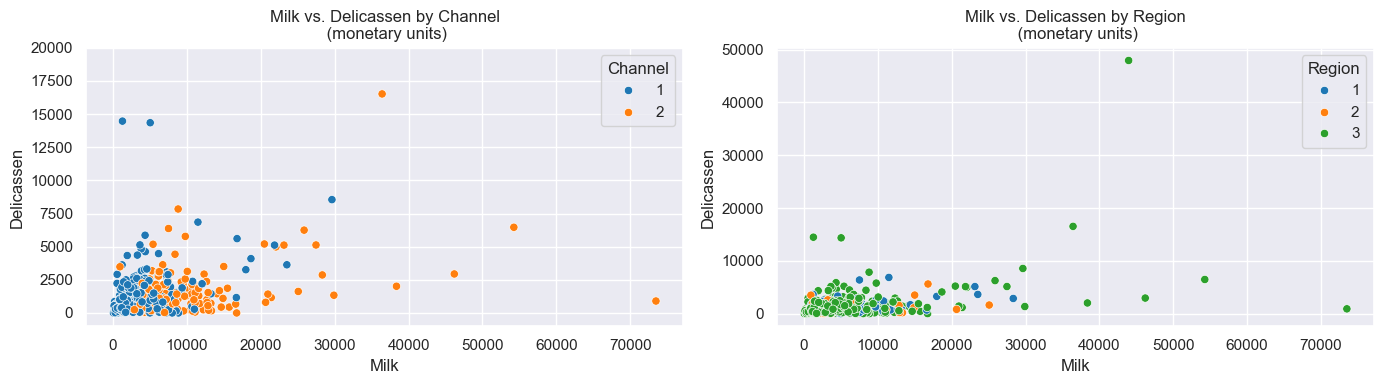

In [20]:
### MILK vs. DELICASSEN by CHANNEL and REGION

fig, axes = plt.subplots(figsize=(14, 4), ncols=2)

# Scatter plot 1: Milk vs. Delicassen by Channel
sns.scatterplot(x='Milk', y='Delicassen', hue='Channel', data=df, ax=axes[0], palette="tab10")
axes[0].set_title('Milk vs. Delicassen by Channel\n (monetary units)')
axes[0].set_xlabel('Milk')
axes[0].set_ylabel('Delicassen')
axes[0].legend(title='Channel', loc='upper right')
# axes[0].set_xlim(-1000, 60000) 
axes[0].set_ylim(-1000, 20000) 

# Scatter plot 2: Milk vs. Delicassen by Region
sns.scatterplot(x='Milk', y='Delicassen', hue='Region', data=df, ax=axes[1], palette="tab10")
axes[1].set_title('Milk vs. Delicassen by Region\n (monetary units)')
axes[1].set_xlabel('Milk')
axes[1].set_ylabel('Delicassen')
axes[1].legend(title='Region', loc='upper right') 
# axes[0].set_xlim(-1000, 60000) 
axes[0].set_ylim(-1000, 20000) 

plt.tight_layout()
plt.show()

***Commnent*** Milk vs. Delicassen
* `Outliers`: There are some notable outliers in Channel 2 and Region 3.
* `Linear relationship`: no correlation between Milk and Delicassen.
* Customer spending across the two channels on this pair of products appears to be equal.
* In term of Region, customers in all three regions have varying needs to buy Milk & Detergents_Paper, wide range from little to much; however, `region 3` (Green) is dominant in numbers and has a few extremely high spenders.

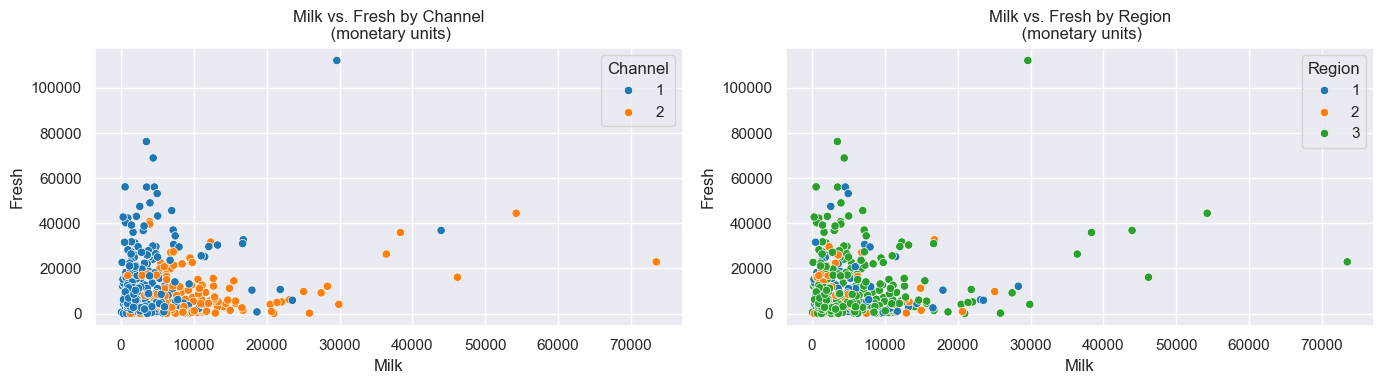

In [21]:
### MILK vs. FRESH by CHANNEL and REGION 

fig, axes = plt.subplots(figsize=(14, 4), ncols=2)

# Scatter plot 1: Milk vs. Fresh by Channel
sns.scatterplot(x='Milk', y='Fresh', hue='Channel', data=df, ax=axes[0], palette="tab10" )
axes[0].set_title('Milk vs. Fresh by Channel\n (monetary units)')
axes[0].set_xlabel('Milk')
axes[0].set_ylabel('Fresh')
axes[0].legend(title='Channel', loc='upper right') 

# Scatter plot 2: Milk vs. Fresh by Region
sns.scatterplot(x='Milk', y='Fresh', hue='Region', data=df, ax=axes[1], palette="tab10")
axes[1].set_title('Milk vs. Fresh by Region\n (monetary units)')
axes[1].set_xlabel('Milk')
axes[1].set_ylabel('Fresh')
axes[1].legend(title='Region', loc='upper right') 

plt.tight_layout()
plt.show()

***Commnent*** Milk vs. Fresh
* `Outliers`: There are some notable outliers in Channel 1,2 and Region 3.
* `Linear relationship`: no correlation between Milk and Delicassen.
* Customer spending across the two channels on this pair of products appears to be equal.
* In term of Region, customers in all three regions have varying needs to buy Milk & Detergents_Paper, wide range from little to much; however, `region 3` (Green) is dominant in numbers and has a few extremely high spenders.

### 6. Handle outliers

In [22]:
# Remove outliers
## Defined-function
def def_Remove_Outliers(df, column_name, lower_percentile=0.25, upper_percentile=0.75, threshold=1.5):
    Q1 = df[column_name].quantile(lower_percentile)
    Q3 = df[column_name].quantile(upper_percentile)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
## Apply Defined-function for numerical variables
for col in num_cols:
    df = def_Remove_Outliers(df, col, threshold=1) 
    
# Reset index
df = df.reset_index(drop=True)

# Check shape
df.shape

(261, 8)

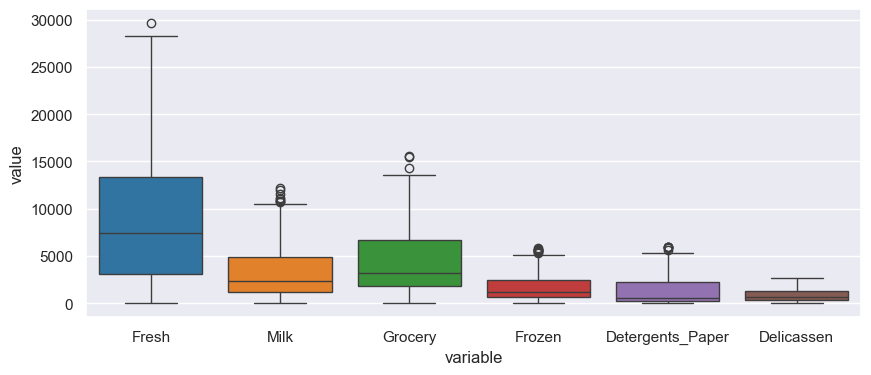

In [23]:
# Draw box plot to check again
plt.figure(figsize=(10,4))
sns.boxplot(x='variable', y='value', data=df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].melt(), palette="tab10")
plt.show()

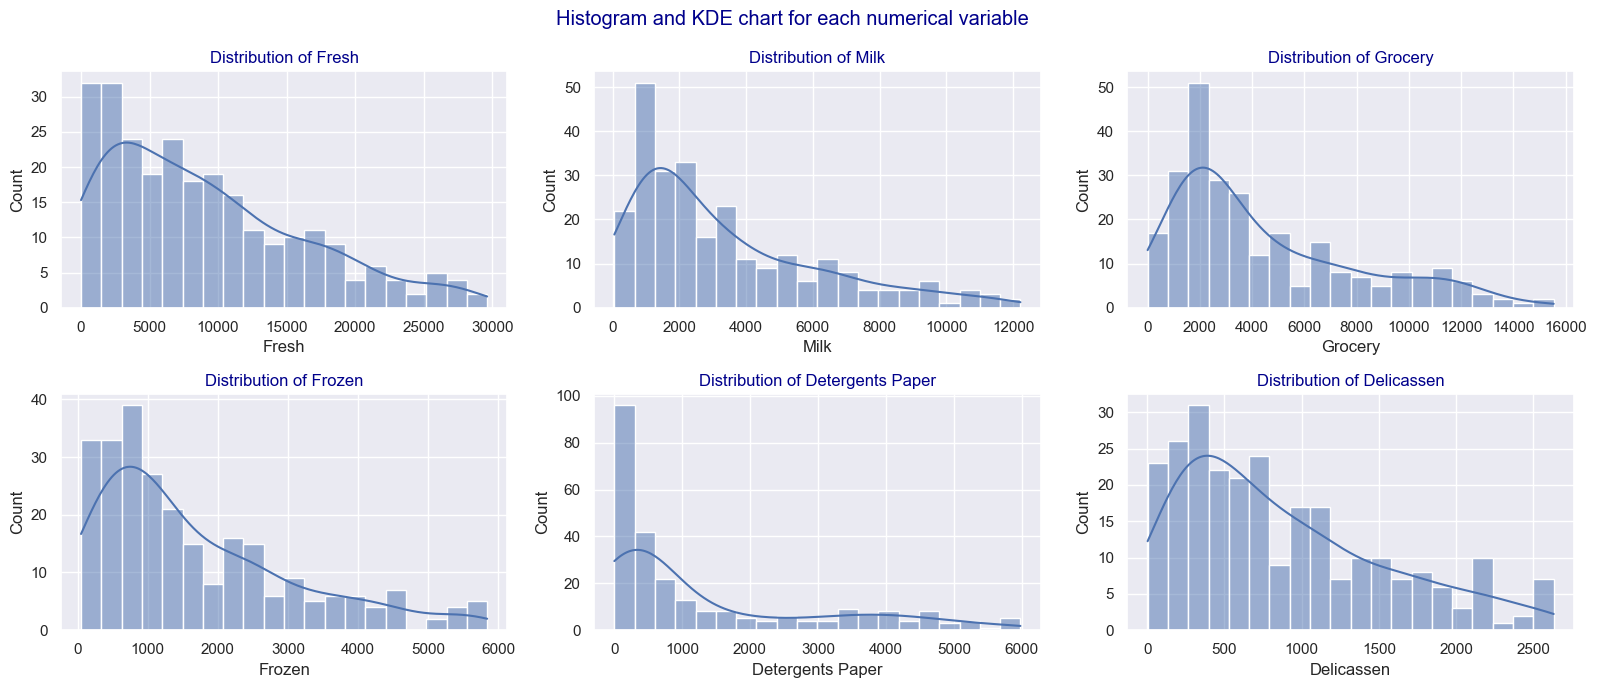

In [24]:
# Draw histogram to check again
def_Draw_Histograms_Univariate(df, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], nrows=2, ncols=3)

***Comment***:

Outliers are reduced.

### 7. Data Transformation

Since K-Means Clustering and Hierarchical Clustering are  distance-based algorithms, the difference of magnitude in variables can create a problem. So let’s first bring all the numerical variables to the same magnitude:

In [25]:
df_scaled = df.copy()            # Keep df original
df_scaled = df_scaled.drop(columns=(['Channel','Region']))      

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in num_cols:
    df_scaled[[col]] = scaler.fit_transform(df_scaled[[col]])

In [27]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# features_to_scale = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# for feature in features_to_scale:
#     df_scaled[[feature]] = scaler.fit_transform(df_scaled[[feature]])

In [28]:
df_scaled.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.427443  0.789231  0.486514  0.028803          0.446880    0.507991
1  0.238053  0.801891  0.615706  0.295792          0.550443    0.674658
2  0.317562  0.674394  0.329771  0.106761          0.299816    0.550989
3  0.409119  0.258446  0.448793  0.074681          0.524845    0.206240
4  0.255670  0.402877  0.606566  0.279752          0.555128    0.975266

# _____________________________
# Part II - KMeans Clustering

_The objective_ of the analysis is to group similar products together into clusters based on their attributes such as **fresh, milk, grocery, frozen, detergents_paper, and delicatessen.** _(Based on Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen cluster the dataset)_. To perform the k-means clustering analysis, we need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

### Find optimum value of K by using elbow method

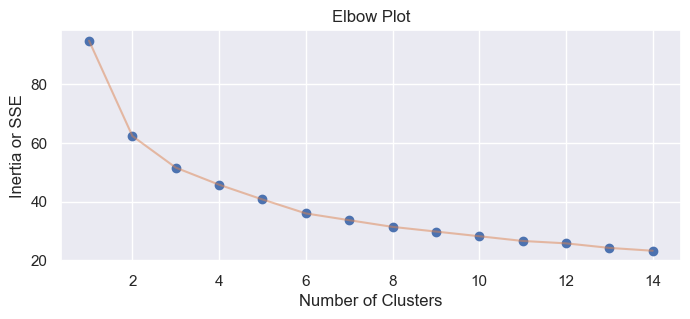

In [29]:
from sklearn.cluster import KMeans

inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10, max_iter=300, 
                          random_state= 42, algorithm='elkan', tol=0.0001) )  
    algorithm.fit(df_scaled)
    inertia.append(algorithm.inertia_)
    
# Plot
plt.figure(1 , figsize = (8 ,3))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia or SSE')
plt.title('Elbow Plot')
plt.show()

***Comment***: 

Based on above graph of elbow method, k=3 or 4 is optimum value because there is a huge reduction in variation with k=6 and after that the variation doesn't go down quickly.
However, we can choose any number of clusters between 3 to 6. Let's try another method to see.

### Find optimum value of K 

14
4


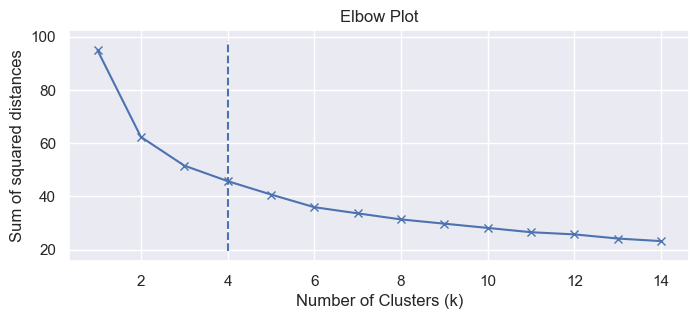

In [30]:
#!pip install kneed
y = inertia
print(len(y))
x = range(1, 15)

from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)

# Plot
plt.figure(1 , figsize = (8 ,3))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared distances')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('Elbow Plot')
plt.show()

***Comment***: 

I decide to choose k=4 and fit the model.

### Build the KMeans Clustering model with k=4

In [31]:
model_kmeans= (KMeans(n_clusters=4 ,init='k-means++', n_init=10, max_iter=300, 
                        tol=0.0001,  random_state=42 ,copy_x=True, algorithm='elkan') )
model_kmeans.fit(df_scaled)

y_pred_kmeans = model_kmeans.predict(df_scaled)   # ~ labels_kmeans = model_kmeans.labels_
centroids_kmeans = model_kmeans.cluster_centers_
SSE = model_kmeans.inertia_

### Evaluate model performance

#### Evaluate by metrics

In [32]:
# Generate 'cluster' column
df['cluster'] = pd.DataFrame(y_pred_kmeans)
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   9413  8259     5126     666              1795   
3        2       3  12126  3199     6975     480              3140   
4        2       3   7579  4956     9426    1669              3321   

   Delicassen  cluster  
0        1338        0  
1        1776        0  
2        1451        0  
3         545        0  
4        2566        0

In [33]:
silhouette_avg = silhouette_score(df_scaled, y_pred_kmeans)
print('Silhouette Score:' , silhouette_avg)
print('Sum of Squared Errors SSE: ', SSE)
print('\nCount in each cluster: \n', df['cluster'].value_counts())
# print('\nCenters of each clusters: \n', centroids_kmeans)

Silhouette Score: 0.24767240987847616
Sum of Squared Errors SSE:  45.73851714779564

Count in each cluster: 
 cluster
2    109
0     63
1     46
3     43
Name: count, dtype: int64


***Comment***:
* `Count in each cluster`: Cluster 2 having the largest number (109) and cluster 3 having the smallest number (43). This indicates that the clusters may be of different sizes or that the data may not be evenly distributed.
* `Silhouette Score` (Evaluating the quality of clustering -1 -> 1): A value around 0.25 indicates a medium quality cluster. This means that the clusters may have overlap or some data points may be assigned to the wrong cluster.

#### Evaluate by visualization

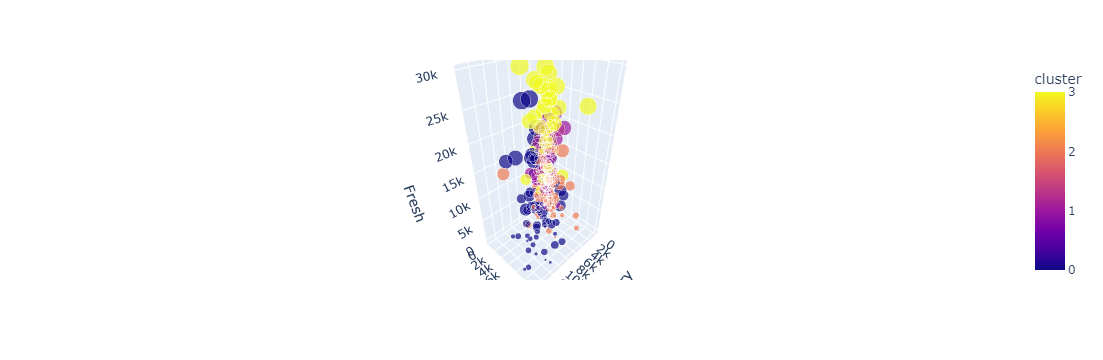

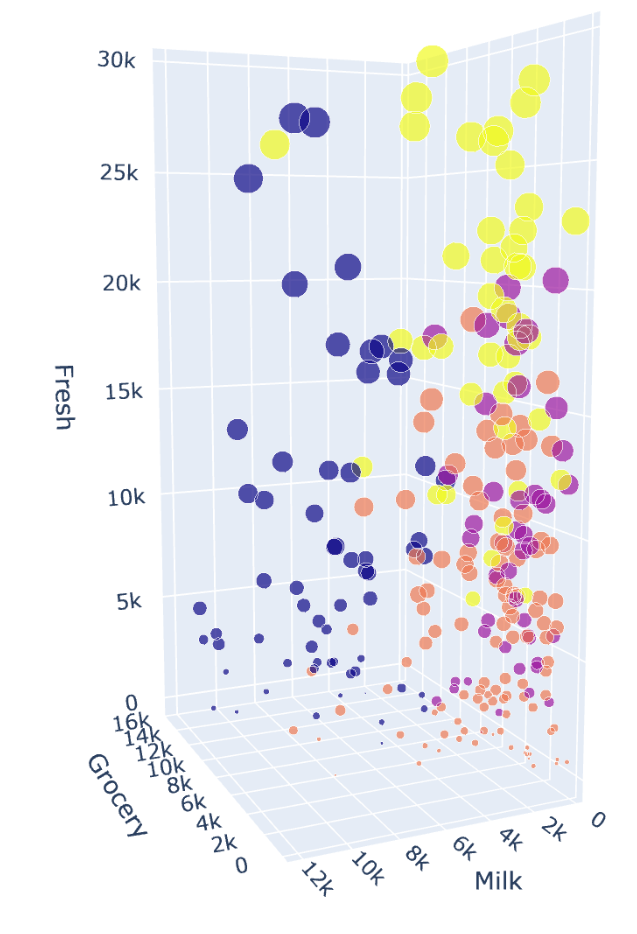

In [34]:
# Visual Clusters 3D based on 3 product categories: Grocery, Milk, Fresh

fig = px.scatter_3d(df, x="Grocery", y="Milk", z="Fresh", color='cluster', size="Fresh", size_max=30)
fig.show()
fig.write_html("images/scatter_3d_plot_KMeans_k4_Grocery_Milk_Fresh_HTML.html")
# HTML(filename="images/scatter_3d_plot_KMeans_k4_Grocery_Milk_Fresh.html")

# Displaying PNG image (for Github purpose)
Image("images/scatter_3d_plot_KMeans_k4_Grocery_Milk_Fresh_PNG.PNG")

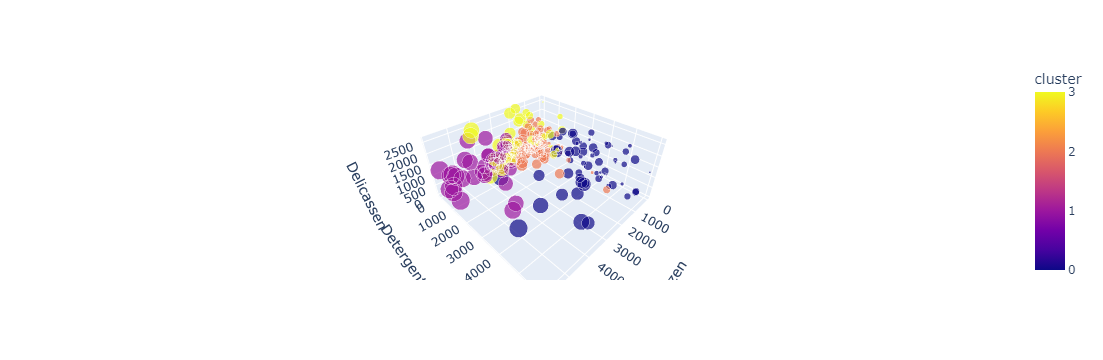

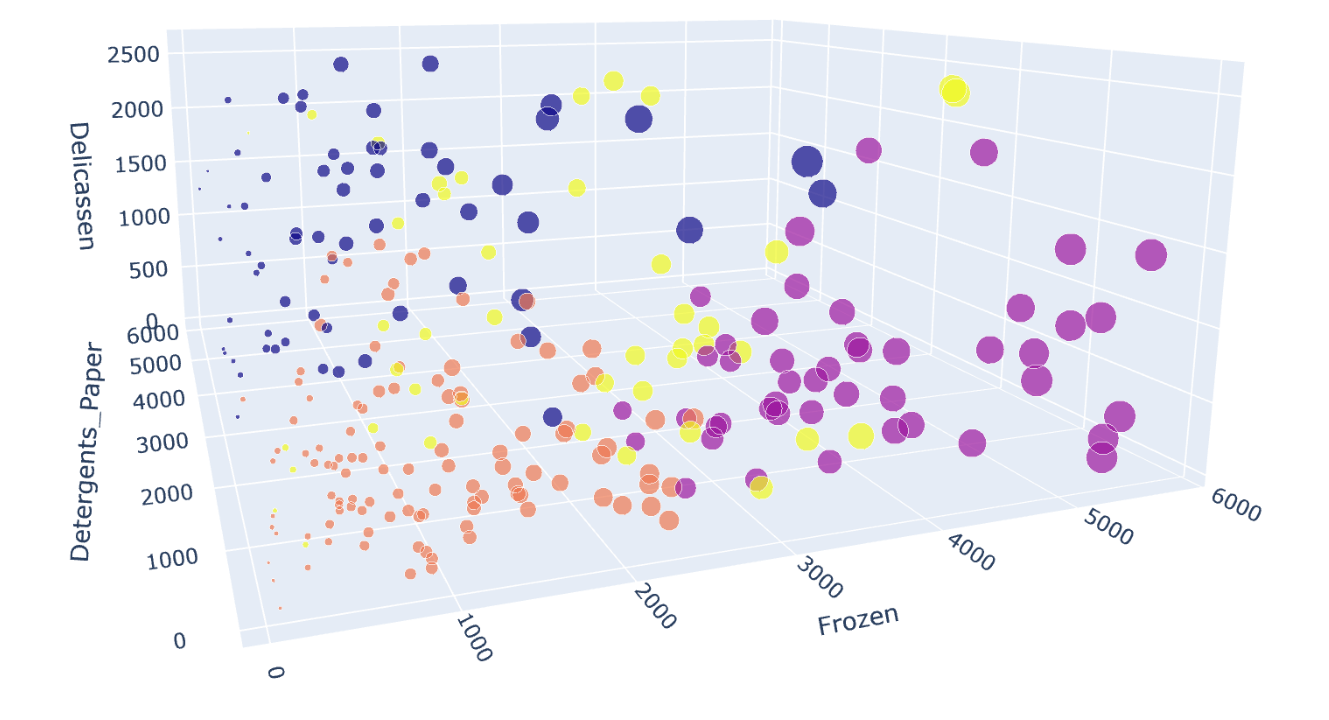

In [35]:
# Visual Clusters 3D based on 3 product categories: Frozen, Detergents_Paper, Delicassen

fig = px.scatter_3d(df, x="Frozen", y="Detergents_Paper", z="Delicassen", color='cluster', size="Frozen", size_max=30)
fig.show()
fig.write_html("images/scatter_3d_plot_KMeans_k4_Frozen_DetergentsPaper_Delicassen.html")
# HTML("images/scatter_3d_plot_KMeans_k4_Frozen_DetergentsPaper_Delicassen.html")

# Displaying PNG image (for Github purpose)
Image("images/scatter_3d_plot_KMeans_k4_Frozen_DetergentsPaper_Delicassen_PNG.PNG")

In [36]:
### Defined-function
def plot_clusters_customizable(df_component_x, df_component_y, y_pred, xlabel='Fresh (monetary units)', ylabel='Milk (monetary units)'):
    scatter_x = df_component_x.values
    scatter_y = df_component_y.values
    group = y_pred
    cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'yellow', 5: 'cyan'}  
    X_centroids = []
    Y_centroids = []

    fig, ax = plt.subplots(figsize=(8, 4))
    for g in np.unique(group):
        ix = np.where(group == g)
        X_centroids.append(np.mean(scatter_x[ix]))
        Y_centroids.append(np.mean(scatter_y[ix]))
        ax.scatter(scatter_x[ix], scatter_y[ix], c=cdict[g], label=g, s=30)

    plt.scatter(X_centroids, Y_centroids, marker='*', s=300, label='Centroids', color='yellow')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Clusters of Customers')
    ax.legend(loc='upper right')
    plt.show()

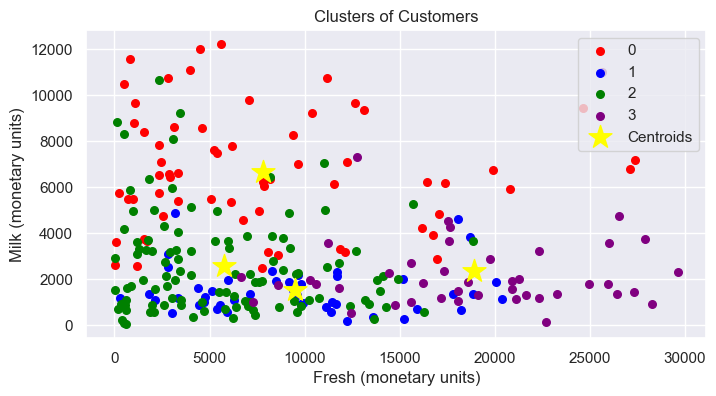

In [37]:
# Visual Clusters 2D based on 2 product categories: Fresh & Milk

plot_clusters_customizable(df['Fresh'], df['Milk'], y_pred_kmeans, xlabel='Fresh (monetary units)', ylabel='Milk (monetary units)')

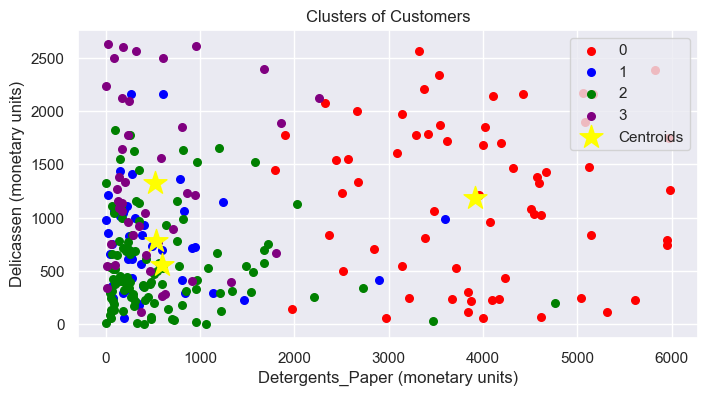

In [38]:
# Visual Clusters 2D based on 2 product categories: Detergents_Pape & Delicassen

plot_clusters_customizable(df['Detergents_Paper'], df['Delicassen'], y_pred_kmeans, xlabel='Detergents_Paper (monetary units)', ylabel='Delicassen (monetary units)')

### Try to Build the KMeans Clustering model with k=3

In [39]:
model_kmeans= (KMeans(n_clusters=3 ,init='k-means++', n_init=10, max_iter=300, 
                        tol=0.0001,  random_state=42 ,copy_x=True, algorithm='elkan') )
model_kmeans.fit(df_scaled)

y_pred_kmeans = model_kmeans.predict(df_scaled)   # ~ labels_kmeans = model_kmeans.labels_
centroids_kmeans = model_kmeans.cluster_centers_
SSE = model_kmeans.inertia_

In [40]:
# Generate 'cluster' column
df['cluster'] = pd.DataFrame(y_pred_kmeans)

In [41]:
silhouette_avg = silhouette_score(df_scaled, y_pred_kmeans)
print('Silhouette Score:' , silhouette_avg)
print('Sum of Squared Errors SSE: ', SSE)
print('\nCount in each cluster: \n', df['cluster'].value_counts())
# print('\nCenters of each clusters: \n', centroids_kmeans)

Silhouette Score: 0.2492319239960829
Sum of Squared Errors SSE:  51.56889287942148

Count in each cluster: 
 cluster
2    120
0     75
1     66
Name: count, dtype: int64


***Comment***:
* `Silhouette Score` this time is same as previous KMeans with k=4 (0.25). This means that the clusters may have overlap or some data points may be assigned to the wrong cluster.
* However, Sum of Squared Errors SSE this time with k=3 (SSE=51) is increased a little, not significantly compared to previous KMeans with k=4 (SSE=45).
* Therefore, choosing k=3 or k=4 is fine.

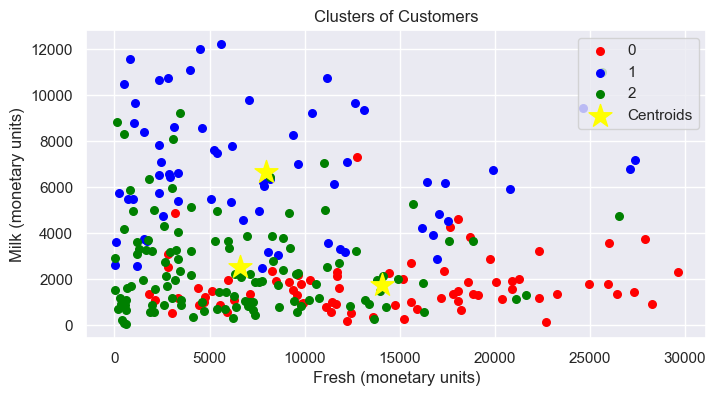

In [42]:
# Visual Clusters 2D based on 2 product categories: Fresh & Milk

plot_clusters_customizable(df['Fresh'], df['Milk'], y_pred_kmeans, xlabel='Fresh (monetary units)', ylabel='Milk (monetary units)')

***Comment***: 

The Kmeans provides the **low-medium clustering quality** (some data points being close together or in different clusters) which may reflect the data may not fit K-Means.

--> Let's try other clustering algorithms:  Hierarchical Clustering 

# __________________________________
# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

### Find the optimal n_clusters by using the dendrogram

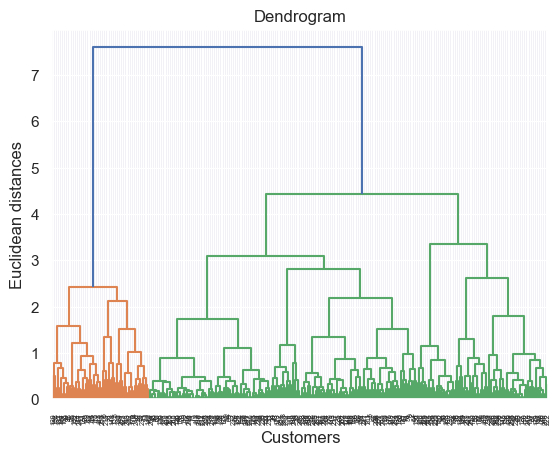

In [43]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

***Comment***:

From Dendrogram above, we understood that there are 3 clusters which we can get by drawing horizontal line from 3 to 4(Euclidean distance)

### Build Agglomerative Clustering model with n_clusters=3

In [44]:
from sklearn.cluster import AgglomerativeClustering
model_hc = AgglomerativeClustering(n_clusters = 3,  linkage = 'ward') 
y_pred_hc = model_hc.fit_predict(df.values)

# Evaluate model
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, y_pred_hc)
print('Silhouette Score:' , silhouette_avg)
print('\nCount in each cluster: \n', pd.DataFrame(y_pred_hc).value_counts())

Silhouette Score: 0.21791689624155394

Count in each cluster: 
 0
0    141
1     65
2     55
Name: count, dtype: int64


#### Evaluate by visualization

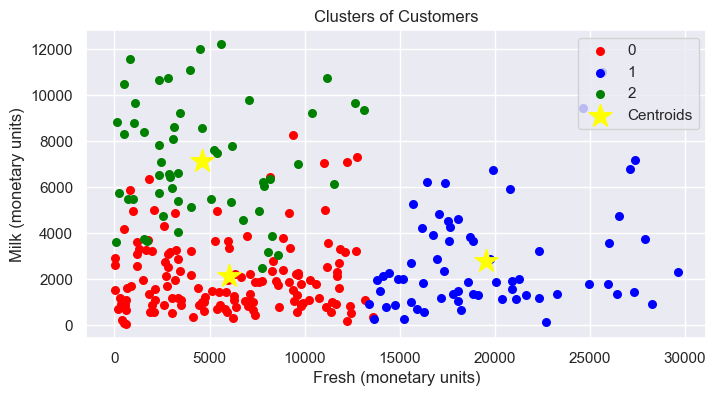

In [45]:
# Visual Clusters 2D based on 2 product categories: Milk & Fresh
plot_clusters_customizable(df['Fresh'], df['Milk'], y_pred_hc, xlabel='Fresh (monetary units)', ylabel='Milk (monetary units)')

***Comment***:

Compared with previous KMeans result , it seems like that Hierarchical Clustering model is better because clusters are clearer, with less overlap.

# ______________
# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [46]:
df = df.drop(columns=(['cluster']))
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   9413  8259     5126     666              1795        1451
3        2       3  12126  3199     6975     480              3140         545
4        2       3   7579  4956     9426    1669              3321        2566

In [47]:
df_scaled.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.427443  0.789231  0.486514  0.028803          0.446880    0.507991
1  0.238053  0.801891  0.615706  0.295792          0.550443    0.674658
2  0.317562  0.674394  0.329771  0.106761          0.299816    0.550989
3  0.409119  0.258446  0.448793  0.074681          0.524845    0.206240
4  0.255670  0.402877  0.606566  0.279752          0.555128    0.975266

## 1. Determine the optimal number of principal components for PCA
given the variables ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], we can use the explained variance ratio. 

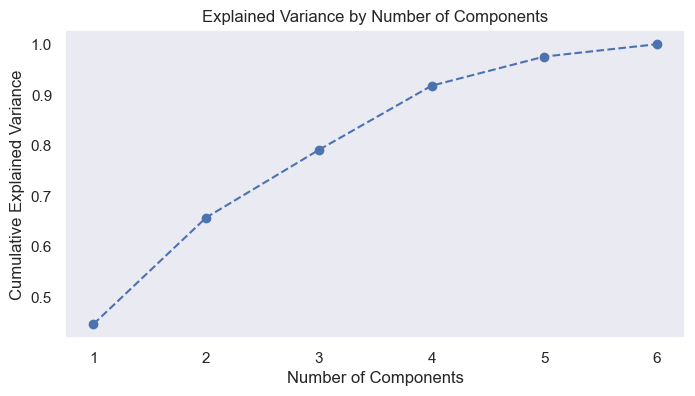

Cumulative Explained Variance by Number of Components:
1 components: 0.4469
2 components: 0.6573
3 components: 0.7911
4 components: 0.9179
5 components: 0.9755
6 components: 1.0000


In [48]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid()
plt.show()

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance by Number of Components:")
for i, variance in enumerate(explained_variance, 1):
    print(f"{i} components: {variance:.4f}")

***Comment***: 

Choosing 4 components is generally a good balance as it captures over 90% of the variance and significantly reduces the dimensionality from the original 6 variables while retaining most of the information.

However, drawing a 4-dimensional space on a 2-dimensional surface is a challenge. 

I decide to choose 2 and 3 principal components to perform clustering.

In [49]:
df_new = df.drop(columns=(['Channel','Region']))

## 2. Try to Perform PCA with 3 principal components and then Clustering 

In [50]:
# Perform PCA
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
data_pca3 = pca3.fit_transform(df_scaled)

# Analyze the meaning of Principal Components
df_loadings = pd.DataFrame(pca3.components_, columns=df_new.columns)
df_loadings = df_loadings.T.rename(columns={0: 'Component 1', 1: 'Component 2', 2: 'Component 3'})
df_loadings

Component 1  Component 2  Component 3
Fresh               -0.097871     0.598360    -0.697964
Milk                 0.480274     0.024497    -0.007521
Grocery              0.528335     0.030885    -0.036082
Frozen              -0.161641     0.536894     0.706867
Detergents_Paper     0.620926    -0.060771     0.078848
Delicassen           0.262572     0.590307     0.074896

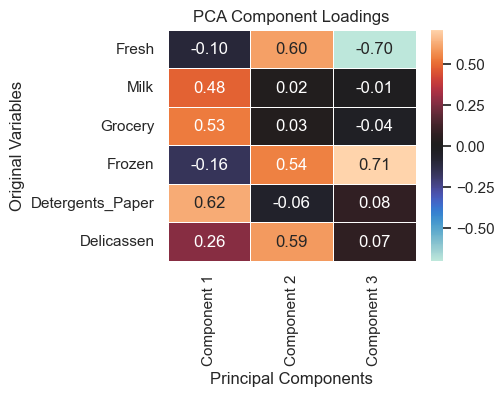

In [51]:
# Visualize Principal Components to uncover the their meaning
plt.figure(figsize=(4, 3))
sns.heatmap(df_loadings, annot=True, fmt='.2f', cmap='icefire', linewidths=0.5)
plt.title('PCA Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Original Variables')
plt.show()

### Interpretation:

* Component 1: Captures spending on **staple goods** like detergents, groceries, and milk.
* Component 2: Reflects spending on **perishable and specialty goods** such as fresh, frozen, and delicatessen items.
* Component 3: Highlights spending primarily on **frozen goods**, with an inverse relationship to spending on fresh and delicatessen items.

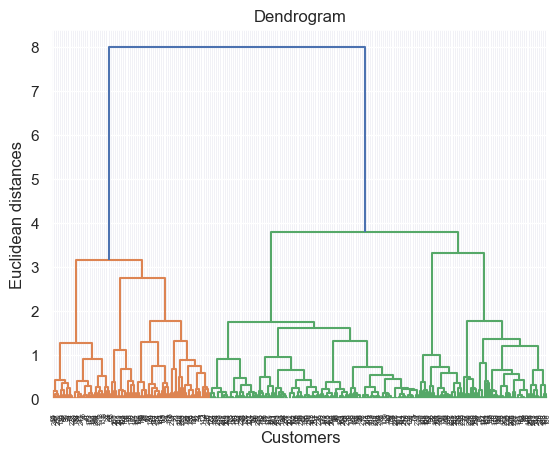

In [52]:
# Find the optimal number of clusters by using the dendrogram
df_pca3 = pd.DataFrame(data_pca3, columns=[f'PC{i+1}' for i in range(data_pca3.shape[1])])

dendrogram = sch.dendrogram(sch.linkage(df_pca3, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

***Comment***: choose n_cluster=3

In [53]:
# Perform AgglomerativeClustering with n_cluster=3

inertia = []
algorithm = AgglomerativeClustering(n_clusters=3)
algorithm.fit(data_pca3)
y_pred = algorithm.fit_predict(data_pca3)

# Evaluate model
silhouette_avg = silhouette_score(data_pca3, y_pred)
print('Silhouette Score:' , silhouette_avg)
print('\nCount in each cluster: \n', pd.DataFrame(y_pred).value_counts())

Silhouette Score: 0.2834482065933545

Count in each cluster: 
 0
2    110
1     83
0     68
Name: count, dtype: int64


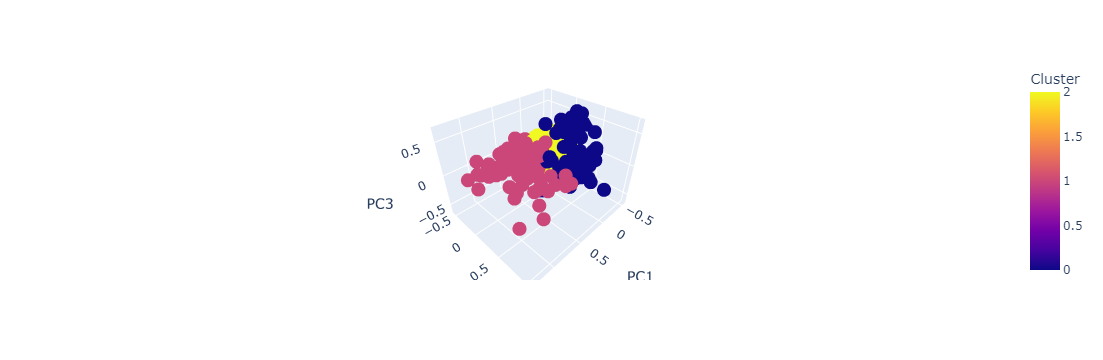

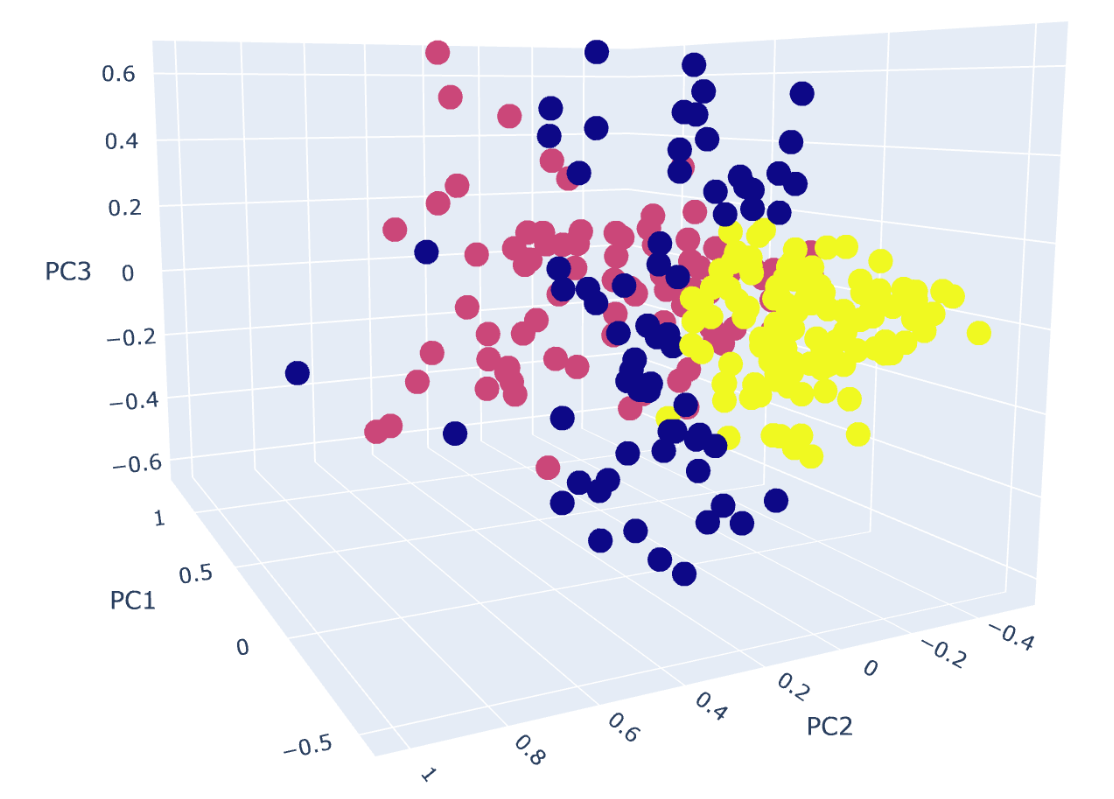

In [54]:
# Visualize Clusters
df_pca3 = pd.DataFrame(data_pca3, columns=[f'PC{i+1}' for i in range(data_pca3.shape[1])])
df_pca3['Cluster'] = y_pred  # Create a DataFrame with the principal components and cluster labels

import plotly.express as px
fig = px.scatter_3d(df_pca3, x="PC1", y="PC2", z="PC3", color='Cluster', size_max=10) 
fig.show()
fig.write_html("images/scatter_3d_plot_PCA_3PCs_Hierarchical_Clustering.html")
# HTML(filename="images/scatter_3d_plot_PCA_3PCs_Hierarchical_Clustering.html")

# Displaying PNG image (for Github purpose)
Image("images/scatter_3d_plot_PCA_3PCs_Hierarchical_Clustering_PNG.PNG")

***Comment***:

Honestly, it is not easy to observe and make correct comments and insights based on 3D images above. So, let's perform PCA with 2 principal components to visualize clusters on 2D surface.

## 3. Perform PCA with 2 principal components and then Clustering 

In [55]:
# Perform PCA
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(df_scaled)

# Analyze the meaning of Principal Components
df_loadings = pd.DataFrame(pca2.components_, columns=df_new.columns)
df_loadings = df_loadings.T.rename(columns={0: 'Component 1', 1: 'Component 2'})
df_loadings

Component 1  Component 2
Fresh               -0.097871     0.598360
Milk                 0.480274     0.024497
Grocery              0.528335     0.030885
Frozen              -0.161641     0.536894
Detergents_Paper     0.620926    -0.060771
Delicassen           0.262572     0.590307

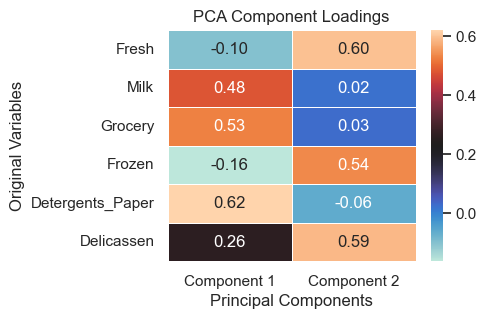

In [56]:
# Visualize Principal Components to uncover the their meaning
plt.figure(figsize=(4, 3))
sns.heatmap(df_loadings, annot=True, fmt='.2f', cmap='icefire', linewidths=0.5)
plt.title('PCA Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Original Variables')
plt.show()

### Interpretation:

From the PCA analysis, we see that:

**Component 1: Captures spending on staple goods and milk**
* High Positive Loadings: Detergents_Paper (0.62), Grocery (0.53), Milk (0.48).
* Interpretation: This component likely represents a general "Shopping" factor where high values indicate substantial spending on frequently purchased items like detergents, groceries, and milk.
  
**Component 2: captures spending on food.**

* High Positive Loadings: Delicassen (0.59), Fresh (0.60), Frozen (0.54).
* Interpretation: This component seems to reflect a "Specialty and Perishable Goods" factor where high values signify higher spending on fresh, frozen, and delicatessen items.

====> These components help differentiate customers based on their **purchasing behavior** in terms of **everyday necessities** versus **food**.

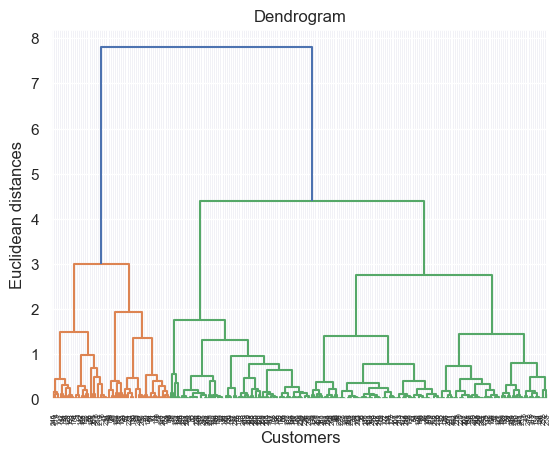

In [57]:
# Find the optimal number of clusters by using the dendrogram
df_pca2 = pd.DataFrame(data_pca2, columns=[f'PC{i+1}' for i in range(data_pca2.shape[1])])
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

***Comment***: 

We can choose n_clusters =3 or 4. Here, after trying, I decide to choose n_cluster=4 because it's easy to interpret its meaning.

In [58]:
# Perform AgglomerativeClustering with n_cluster=3

inertia = []
algorithm = AgglomerativeClustering(n_clusters=4)
algorithm.fit(data_pca2)
y_pred = algorithm.fit_predict(data_pca2)

# Evaluate model
silhouette_avg = silhouette_score(data_pca2, y_pred)
print('Silhouette Score:' , silhouette_avg)
print('\nCount in each cluster: \n', pd.DataFrame(y_pred).value_counts())

Silhouette Score: 0.36552512711677737

Count in each cluster: 
 0
0    125
2     74
1     33
3     29
Name: count, dtype: int64


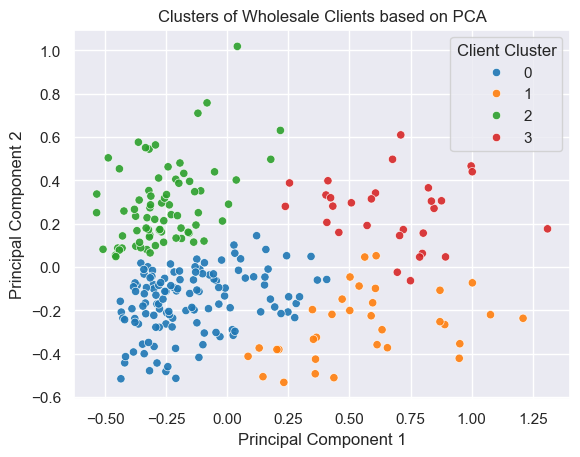

In [59]:
# Visualize Clusters
df_pca2 = pd.DataFrame(data_pca2, columns=[f'PC{i+1}' for i in range(data_pca2.shape[1])])
df_pca2['Cluster'] = y_pred  # Create a DataFrame with the principal components and cluster labels

# plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette('tab10', n_colors=len(set(y_pred))),
    data=df_pca2,
    legend='full',
    alpha=0.9
)
plt.title('Clusters of Wholesale Clients based on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Client Cluster')
plt.savefig('images/Project_Outcome.png')
plt.show()

### Insights:
From the clustering results using AgglomerativeClustering and PCA, with Principal Component 1 as the x-axis and Principal Component 2 as the y-axis, we can divide customers into 3 client groups as follows:

**1. Customer Group 1 (Blue):**
> - Low values on both Component 1 and Component 2.
> - Purchasing Behavior: Customers in this group exhibit low purchasing activity overall
> - Possible Customer Segment: **Occasional Shoppers**: These customers might be infrequent shoppers who do not have high demand for either staple goods or specialty items. They might shop occasionally or have **smaller households**.

**2. Customer Group 2 (Orange):**
> - High values on Component 1, but low values on Component 2.
> - Purchasing Behavior: This group primarily shops for daily necessities such as detergents, groceries, and milk.
> - Possible Customer Segment: **Household Shoppers**: They might be families or individuals who prioritize regular household needs over specialty items. This group could include working professionals, busy parents, or students who need consistent supplies of basic goods.

**3. Customer Group 3 (Green):**
> - Contrast to Client Group 2, this group has low values on Component 1, but high values on Component 2.
> - Purchasing Behavior: This group primarily shops for food goods such as fresh, frozen, and delicatessen items. These customers might prioritize fresh and specialty food items over basic household staples
> - Possible Customer Segment: **Food Enthusiasts**: They could include health-conscious individuals, foodies, or those **who prefer cooking with fresh ingredients. This segment might also include restaurant owners or chefs who focus on fresh produce and specialty items.**

**4. Customer Group 4 (Red):**
> - High values on both Component 1 and Component 2.
> - Purchasing Behavior: Customers have high purchasing activity. Customers in this group exhibit high purchasing activity for both daily necessities and specialty food items.
> - Possible Customer Segment: **High-Spending Shoppers**: They might be **affluent households, large families, or businesses** that require a wide variety of products. This group could also include wholesale buyers or bulk purchasers who need a mix of everyday and specialty items.

# Part V - Conclusion

Guidance: From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

> * Across the different channels and regions, there is a consistent **linear trend** where higher spending in one product category positively correlates with higher spending in another, most notably between `Milk & Grocery`, between `Grocery & Detergents_Paper`, and between `Milk & Detergents_Paper` ---> suggesting predictable purchasing patterns in purchasing behavior that can inform inventory management and promotional campaigns.

> *  The analysis highlighted notable **outliers**, particularly in `Channel 2` and `Region 3`, indicating the presence of customers with significantly higher purchasing activity. These outliers present opportunities for customized loyalty programs and targeted sales approaches.
>  * `Channel 1` and `Region 1 and 2` customers generally show lower spending, suggesting they might be more price-sensitive or have less demand for these products.

> * **Customer Segmentation**: The PCA and clustering analysis identified four distinct customer groups based on purchasing behavior. These groups vary significantly in their spending on everyday necessities versus specialty items. We can **categorize customers into 4 main groups** as above (`Occasional Shoppers`, `Household Shoppers`, `Food Shoppers`, `High-Spending Shoppers`) to help us better understand customer purchasing behaviors. This segmentation can be leveraged to tailor and develop targeted marketing strategies, optimize product offerings, and improve customer satisfaction by catering to the specific needs of each group. Understanding these segments allows for better inventory management and personalized customer engagement, ultimately driving business growth and customer loyalty. For example, clustering revealed high-spending customers (Cluster 4 - Red) who purchase large quantities of both staple and specialty goods, indicating a lucrative target for premium marketing strategies.
